In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

encoded = pd.read_parquet('../cache/encoded.parquet')
encoded.head()

Date   Timestamp  Actor1Country  Actor1GeoCountry  Actor1Type  \
0 2019-01-01  1546300800             21                21           4   
1 2019-01-01  1546300800             16                 1          32   
2 2019-01-01  1546300800             21                20           9   
3 2019-01-01  1546300800             20                20          32   
4 2019-01-01  1546300800             20                20           6   

   Actor1TypeGeneral  Actor2Country  Actor2GeoCountry  Actor2Type  \
0                  4             21                21          32   
1                  5             21                21          32   
2                  2             21                20           9   
3                  5             21                21          32   
4                  0             21                21          32   

   Actor2TypeGeneral  ...  NumArticles   AvgTone  \
0                  5  ...           50  2.354384   
1                  5  ...           30 -0.339542   
2                  2  ...           40  1.734061   
3                  5  ...           21 -4.170072   
4                  5  ...           18  1.415701   

                                              Source  pct_change_15min  \
0  https://telegrafi.com/ne-shenj-proteste-labino...         -0.033061   
1  http://www.jornaldeluzilandia.com.br/txt.php?i...         -0.033061   
2  https://hanfordsentinel.com/news/national/govt...         -0.033061   
3  http://midutahradio.com/news/national-news/lou...         -0.033061   
4  http://www.q106dot5.com/news/blind-baker-launc...         -0.033061   

   pct_change_30min  pct_change_24h QuadClass_VerbalCoop  \
0         -0.226363       -2.433464                 True   
1         -0.226363       -2.433464                 True   
2         -0.226363       -2.433464                 True   
3         -0.226363       -2.433464                False   
4         -0.226363       -2.433464                 True   

   QuadClass_MaterialCoop  QuadClass_VerbalConf  QuadClass_MaterialConf  
0                   False                 False                   False  
1                   False                 False                   False  
2                   False                 False                   False  
3                   False                  True                   False  
4                   False                 False                   False  

[5 rows x 24 columns]

In [11]:
encoded.dtypes

Date                      datetime64[ns]
Timestamp                          int64
Actor1Country                      int64
Actor1GeoCountry                   int64
Actor1Type                         int64
Actor1TypeGeneral                  int64
Actor2Country                      int64
Actor2GeoCountry                   int64
Actor2Type                         int64
Actor2TypeGeneral                  int64
ActionCountry                      int64
EventType                          int64
GoldsteinScale                   float64
NumSources                         int64
NumArticles                        int64
AvgTone                          float64
Source                            object
pct_change_15min                 float64
pct_change_30min                 float64
pct_change_24h                   float64
QuadClass_VerbalCoop                bool
QuadClass_MaterialCoop              bool
QuadClass_VerbalConf                bool
QuadClass_MaterialConf              bool
dtype: object

In [12]:
encoded = encoded.drop(columns=['Date', 'Source'])

In [13]:
numerical_columns = encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_columns = merged.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the target variable from the lists if present
# numerical_columns = [col for col in numerical_columns if col != 'pct_change_30min']


In [14]:
# Compute correlations between numerical columns and the numerical target variable (pearson)
correlations = encoded[numerical_columns].corr()
correlations_30min = correlations['pct_change_30min'].drop('pct_change_30min').sort_values(ascending=False)
correlations_15min = correlations['pct_change_15min'].drop('pct_change_15min').sort_values(ascending=False)
correlations_24h = correlations['pct_change_24h'].drop('pct_change_24h').sort_values(ascending=False)
print(correlations_15min)
print("--------------------------------")
print(correlations_30min)
print("--------------------------------")
print(correlations_24h)

pct_change_30min     0.705240
pct_change_24h       0.110572
Actor1Type           0.000937
Actor2TypeGeneral    0.000841
Actor2Type           0.000654
Actor1TypeGeneral    0.000538
ActionCountry        0.000466
GoldsteinScale       0.000435
AvgTone              0.000356
EventType            0.000288
Actor1GeoCountry     0.000141
Actor2GeoCountry     0.000092
Actor2Country       -0.000497
NumSources          -0.000635
Actor1Country       -0.000751
NumArticles         -0.000789
Timestamp           -0.001693
Name: pct_change_15min, dtype: float64
--------------------------------
pct_change_15min     0.705240
pct_change_24h       0.155786
Actor2Type           0.000595
EventType            0.000589
Actor2TypeGeneral    0.000565
ActionCountry        0.000532
AvgTone              0.000500
Actor1GeoCountry     0.000479
Actor2GeoCountry     0.000403
Actor1Type           0.000197
Actor1Country        0.000071
GoldsteinScale       0.000035
Actor1TypeGeneral   -0.000146
Actor2Country       -0.00029

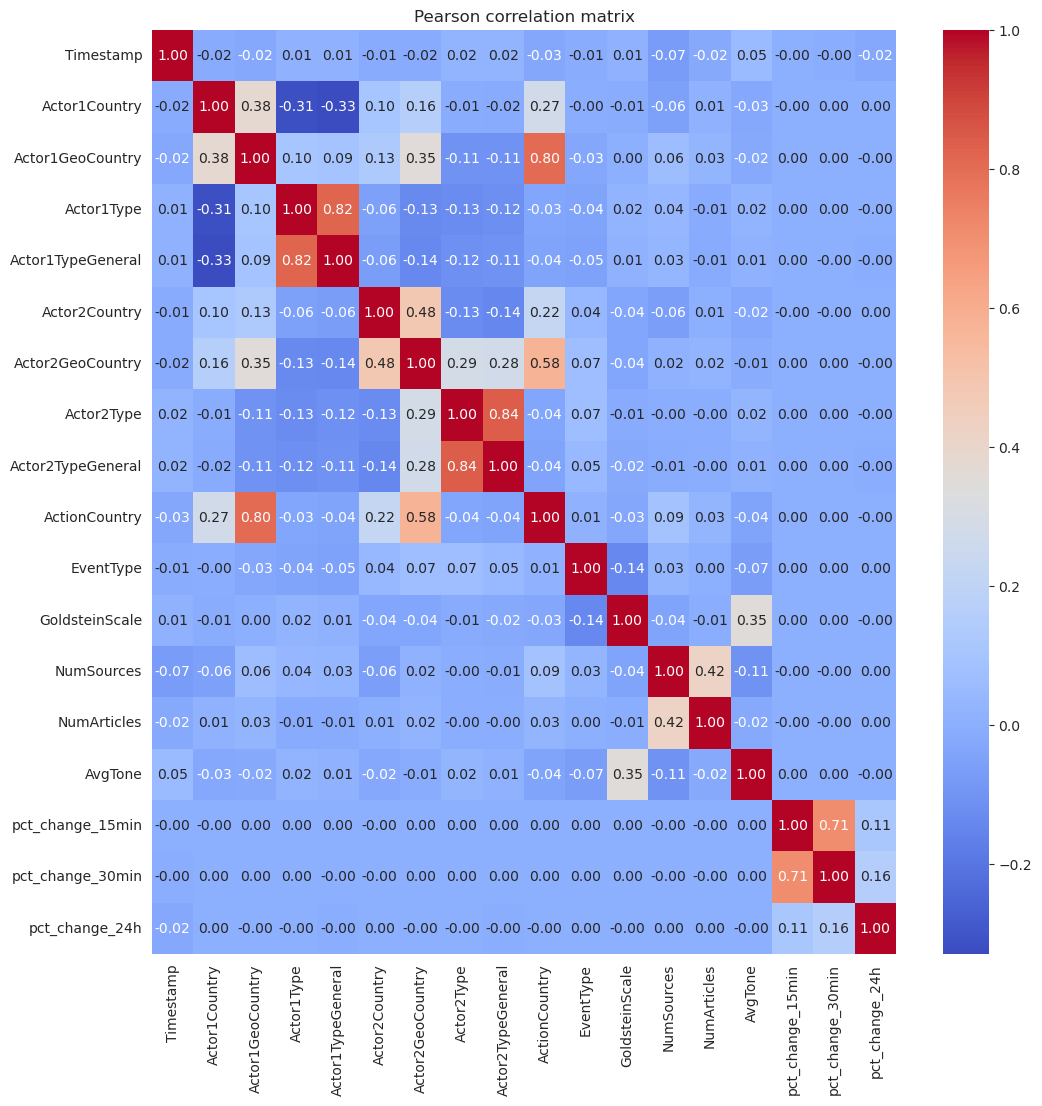

In [15]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson correlation matrix')
plt.show()

In [16]:
# Compute correlations between numerical columns and the numerical target variable (spearman)
spearman_correlations = encoded[numerical_columns].corr(method='spearman')
correlations_30min = spearman_correlations['pct_change_30min'].drop('pct_change_30min').sort_values(ascending=False)
correlations_15min = spearman_correlations['pct_change_15min'].drop('pct_change_15min').sort_values(ascending=False)
correlations_24h = spearman_correlations['pct_change_24h'].drop('pct_change_24h').sort_values(ascending=False)
print(correlations_15min)
print("--------------------------------")
print(correlations_30min)
print("--------------------------------")
print(correlations_24h)

pct_change_30min     0.657065
pct_change_24h       0.098908
NumSources           0.002727
ActionCountry        0.002407
Actor1GeoCountry     0.001604
Actor1Type           0.001511
Actor1TypeGeneral    0.001167
Actor2TypeGeneral    0.000858
Actor2Type           0.000722
Actor2GeoCountry     0.000675
NumArticles          0.000352
EventType            0.000318
Actor2Country        0.000234
GoldsteinScale      -0.000007
Actor1Country       -0.000349
AvgTone             -0.000804
Timestamp           -0.004861
Name: pct_change_15min, dtype: float64
--------------------------------
pct_change_15min     0.657065
pct_change_24h       0.139075
NumSources           0.003599
ActionCountry        0.002961
Actor1GeoCountry     0.002332
Actor2GeoCountry     0.001157
Actor2Country        0.000562
EventType            0.000554
NumArticles          0.000541
Actor1Country        0.000531
Actor2TypeGeneral    0.000492
Actor1Type           0.000392
Actor2Type           0.000326
Actor1TypeGeneral    0.00030

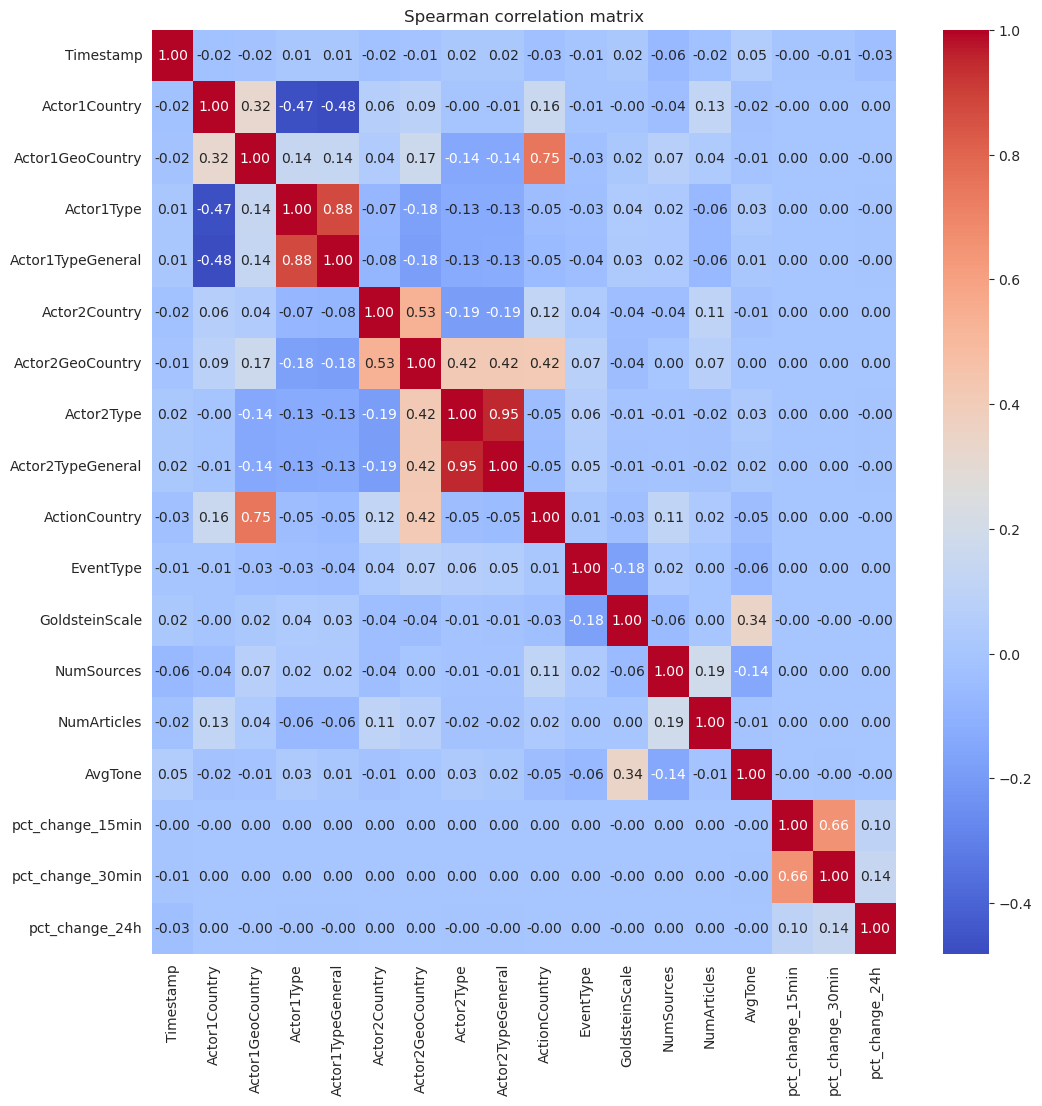

In [17]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_correlations, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Spearman correlation matrix')
plt.show()

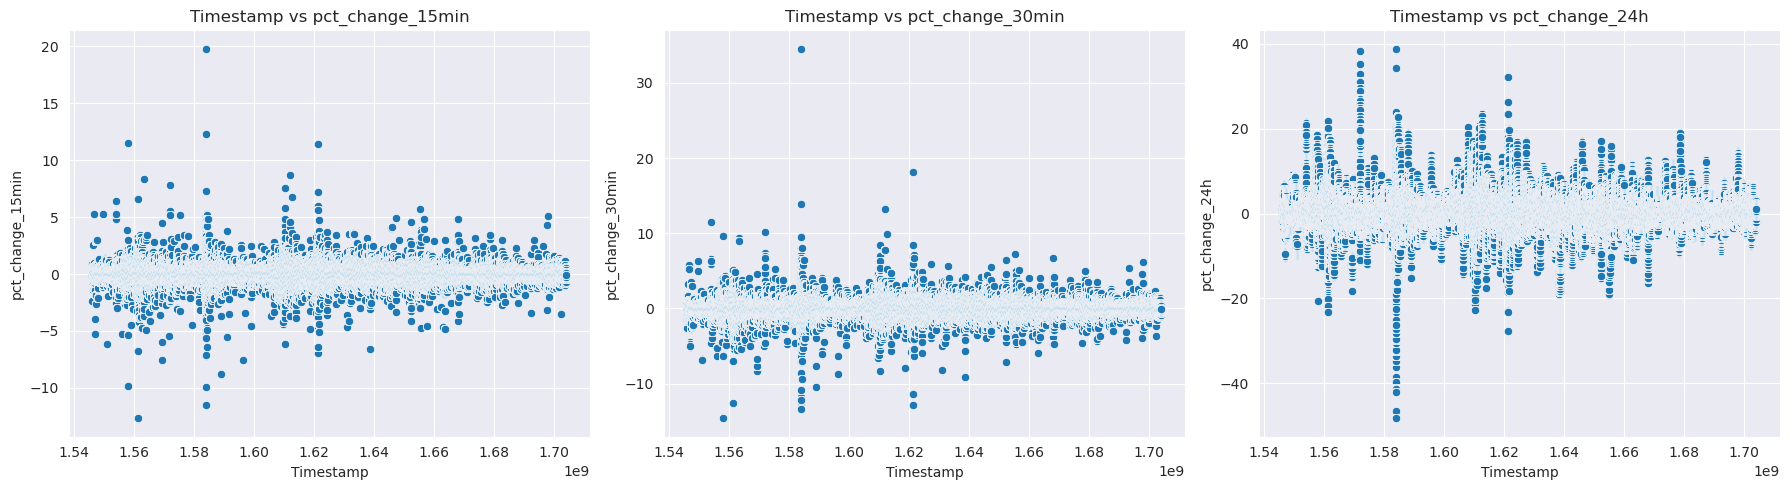

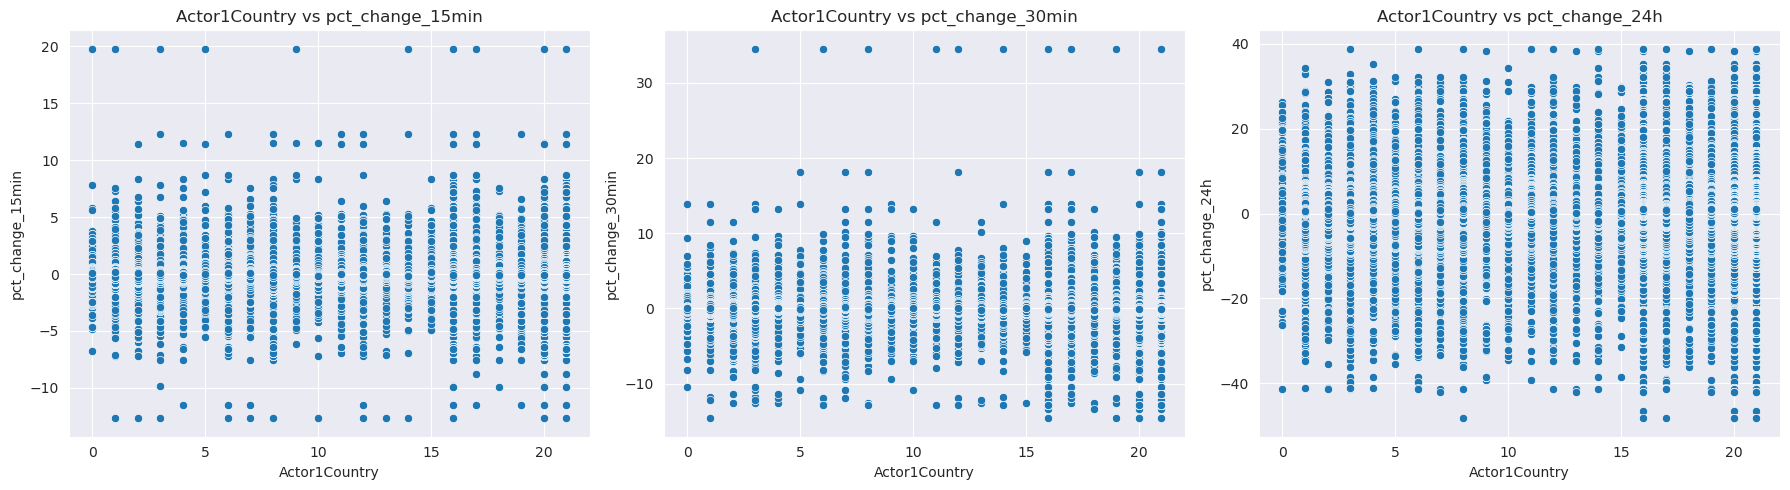

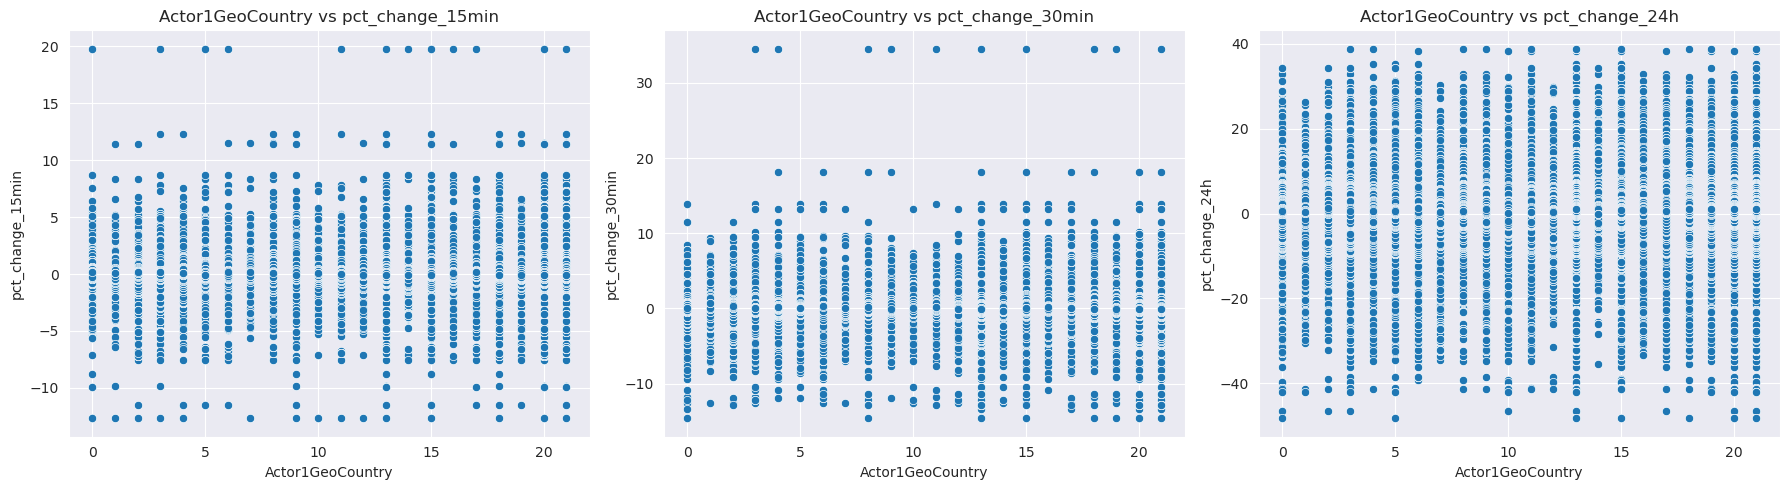

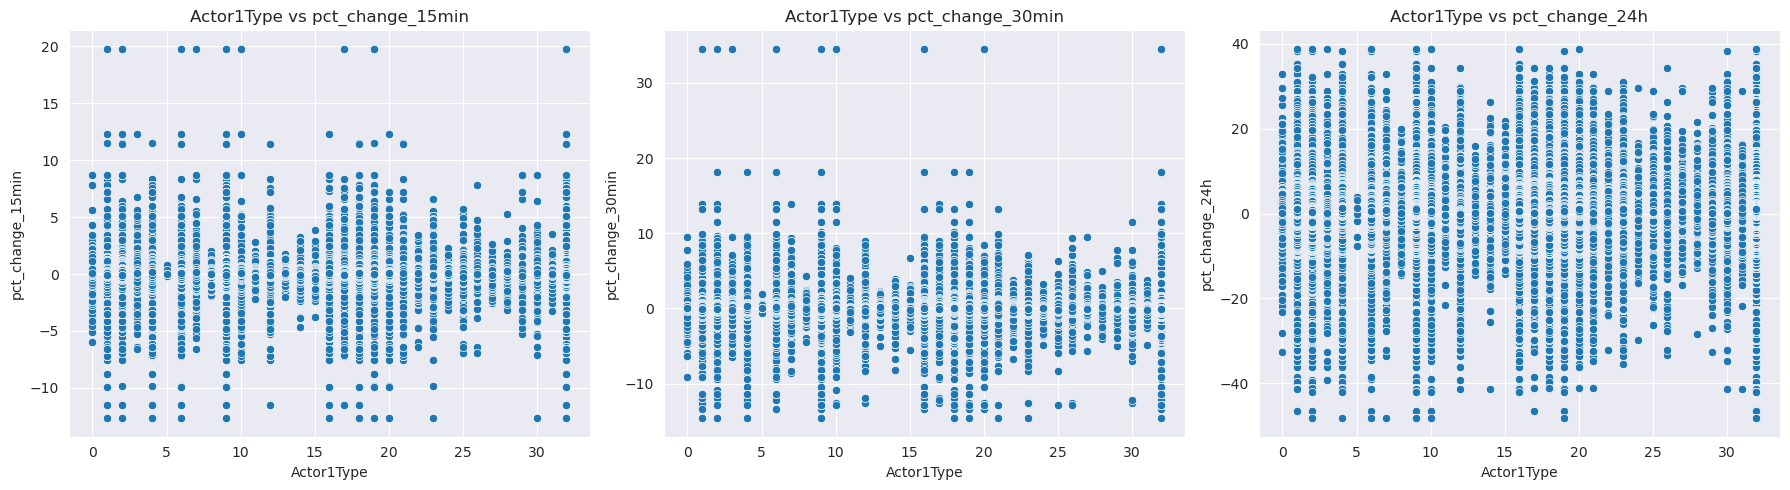

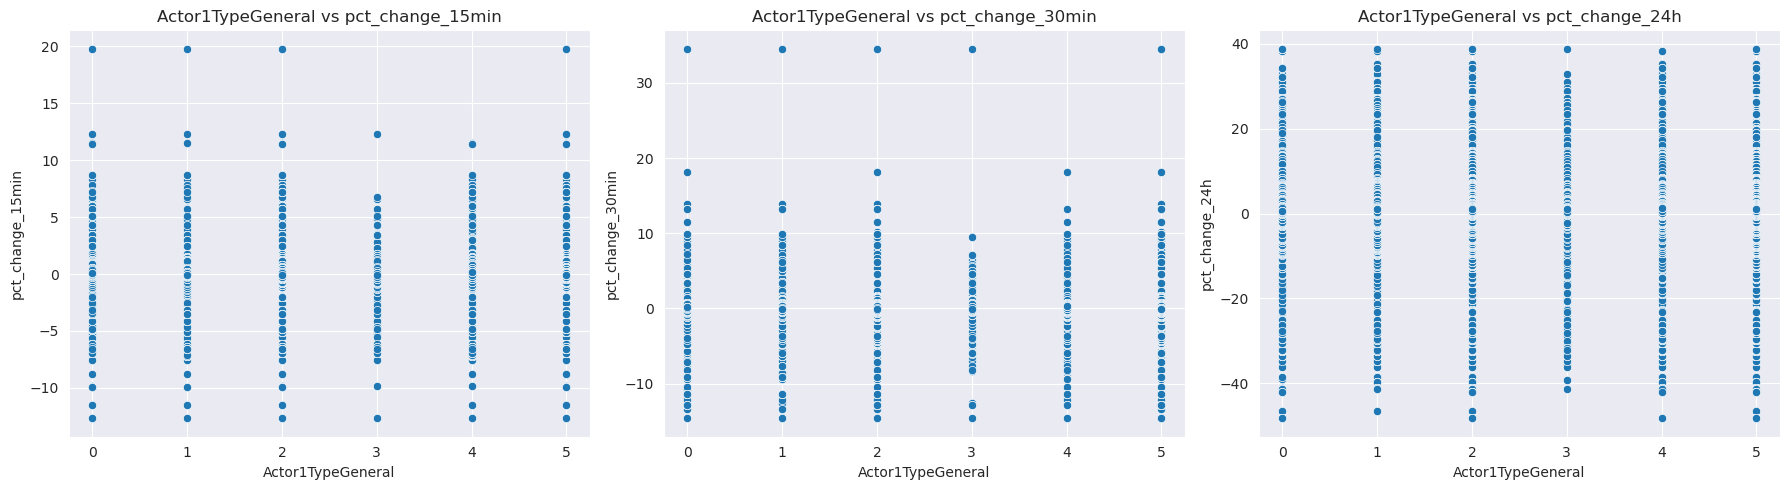

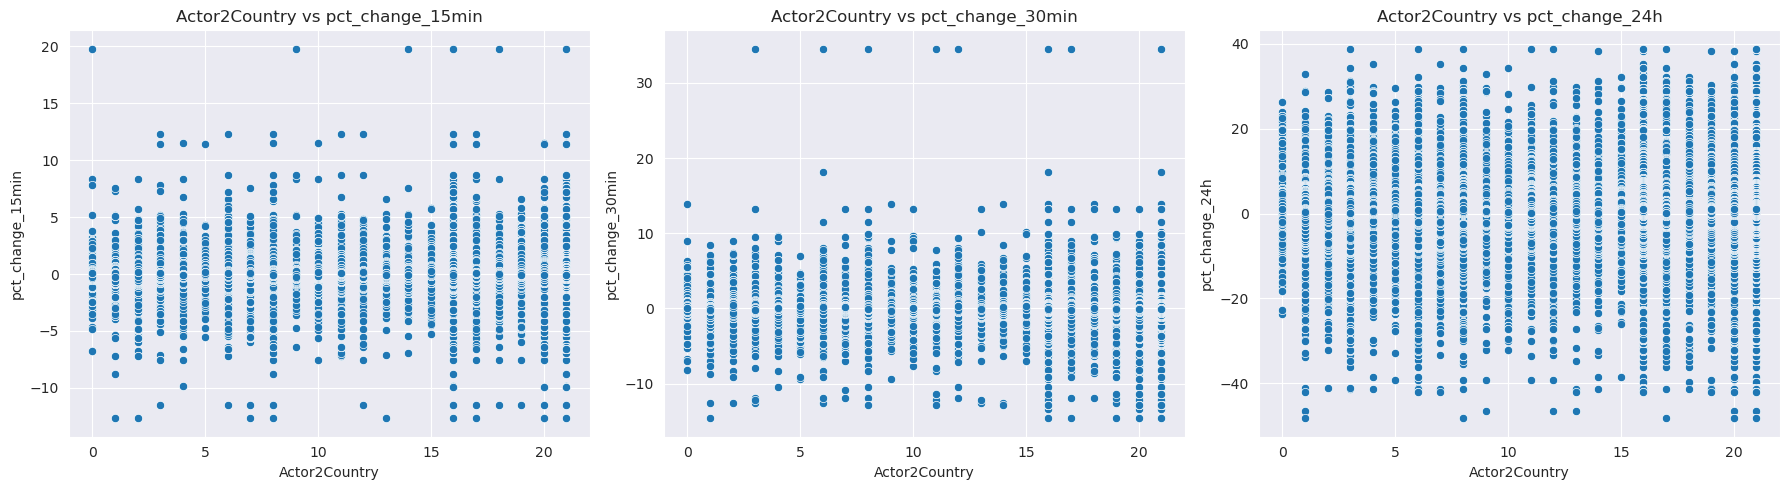

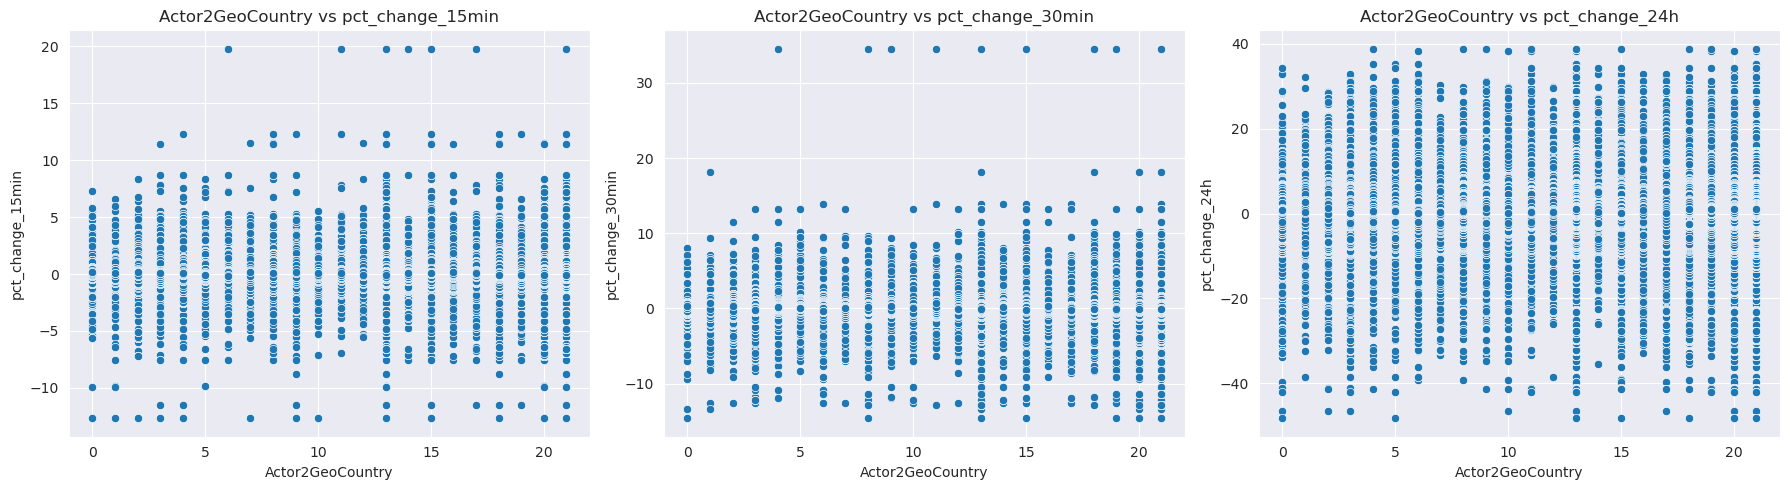

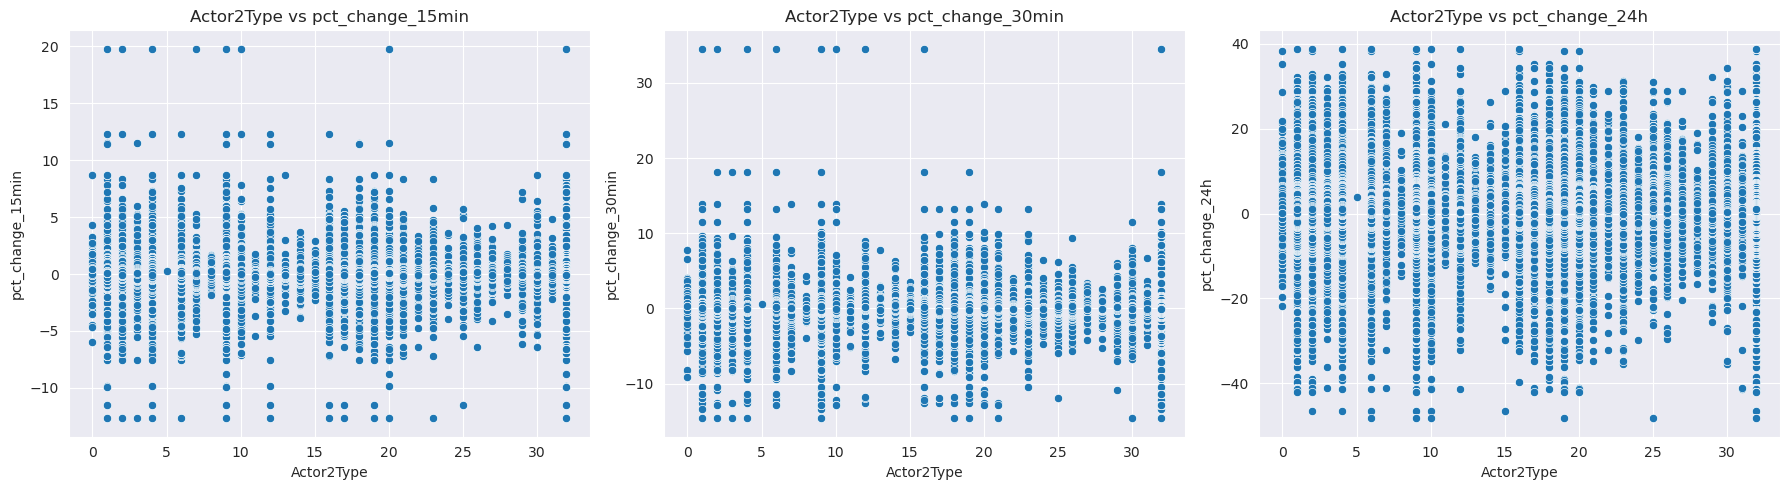

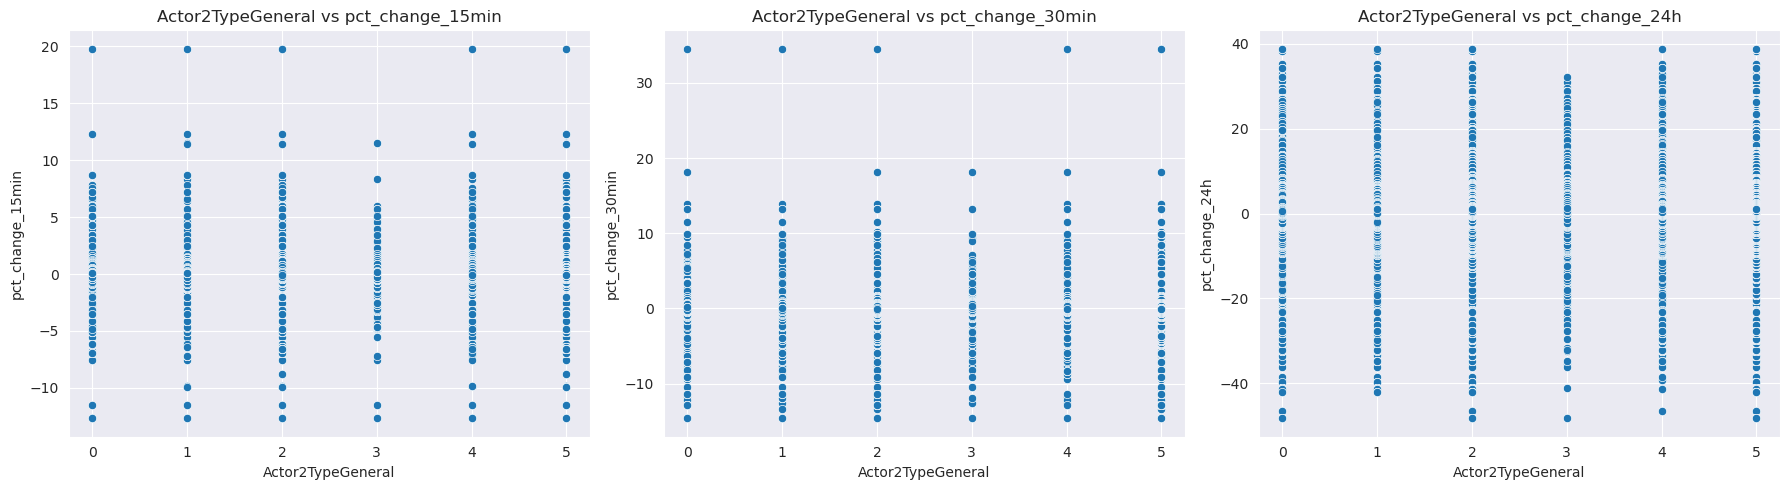

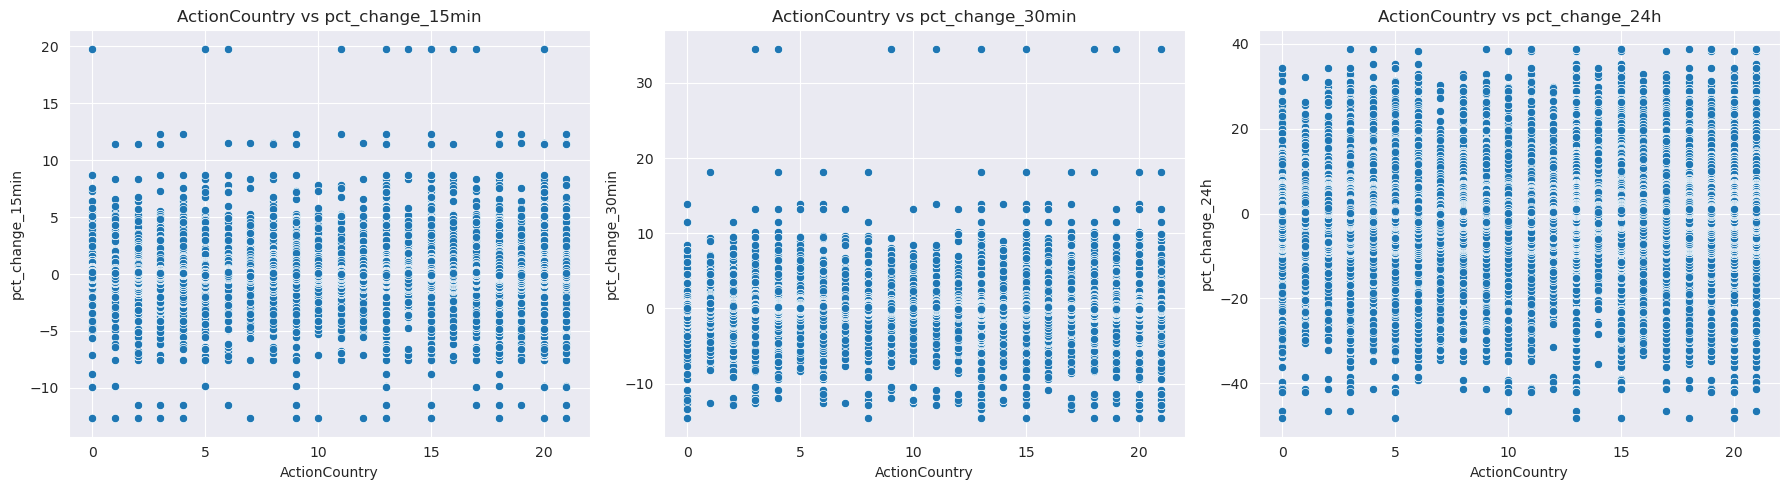

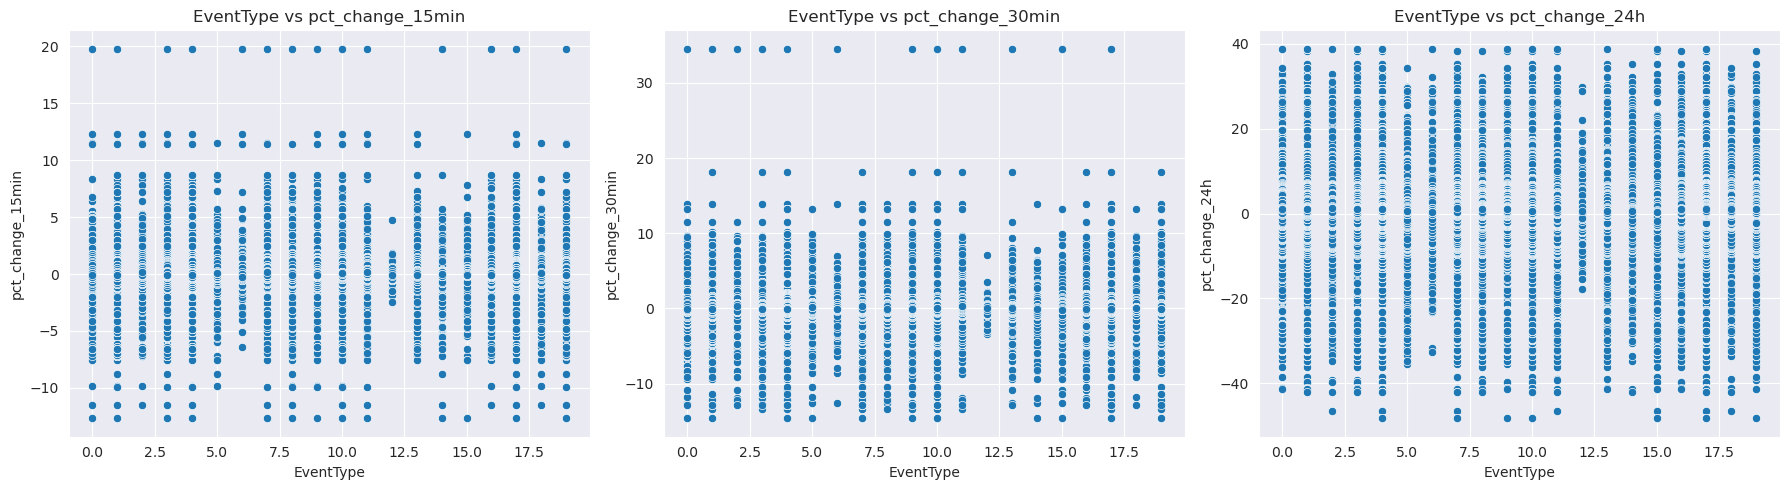

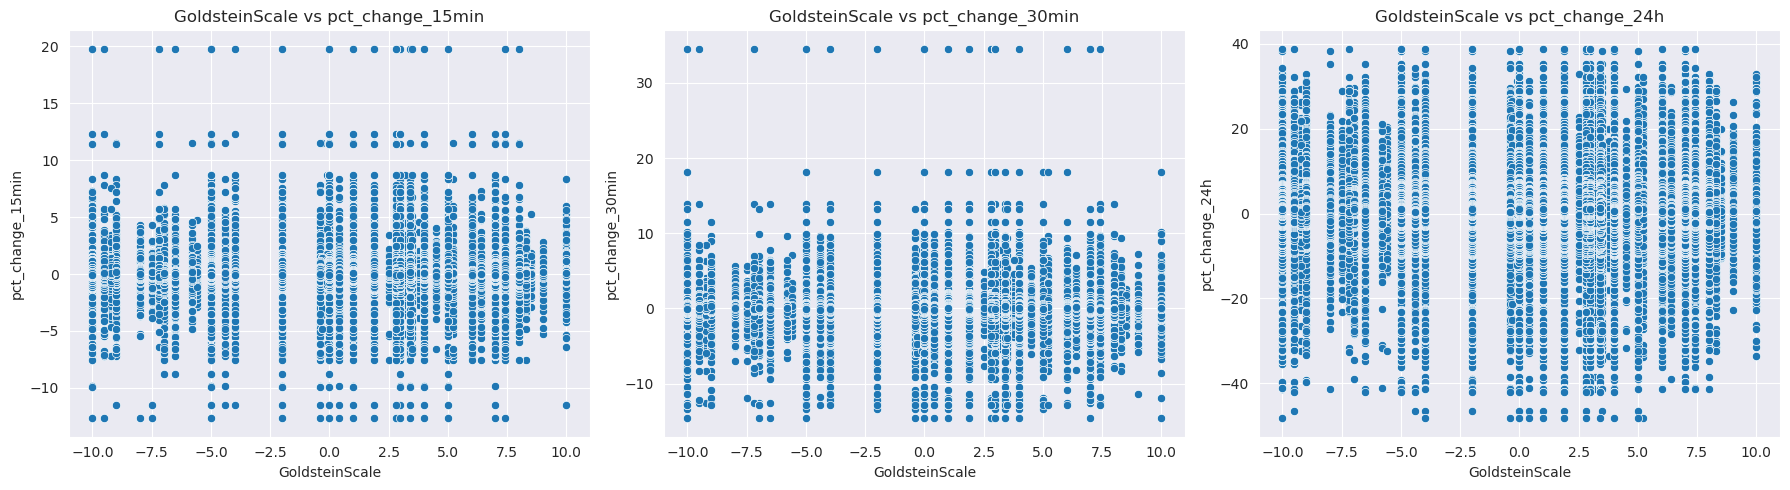

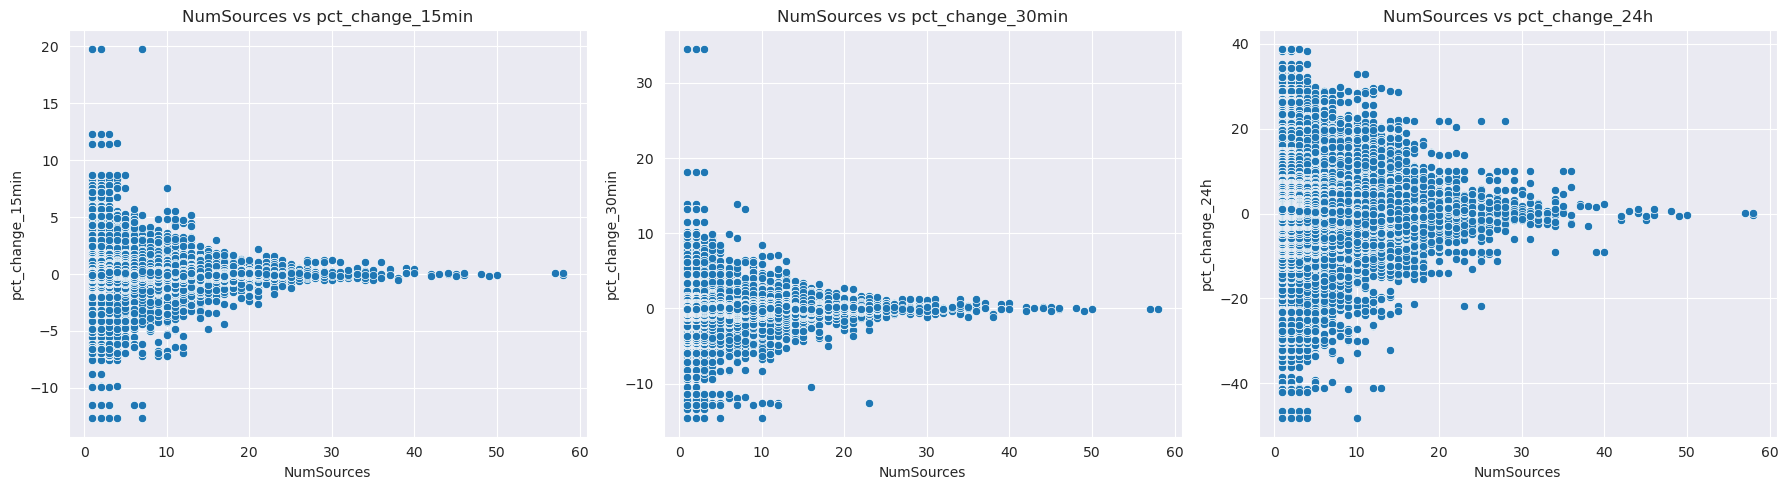

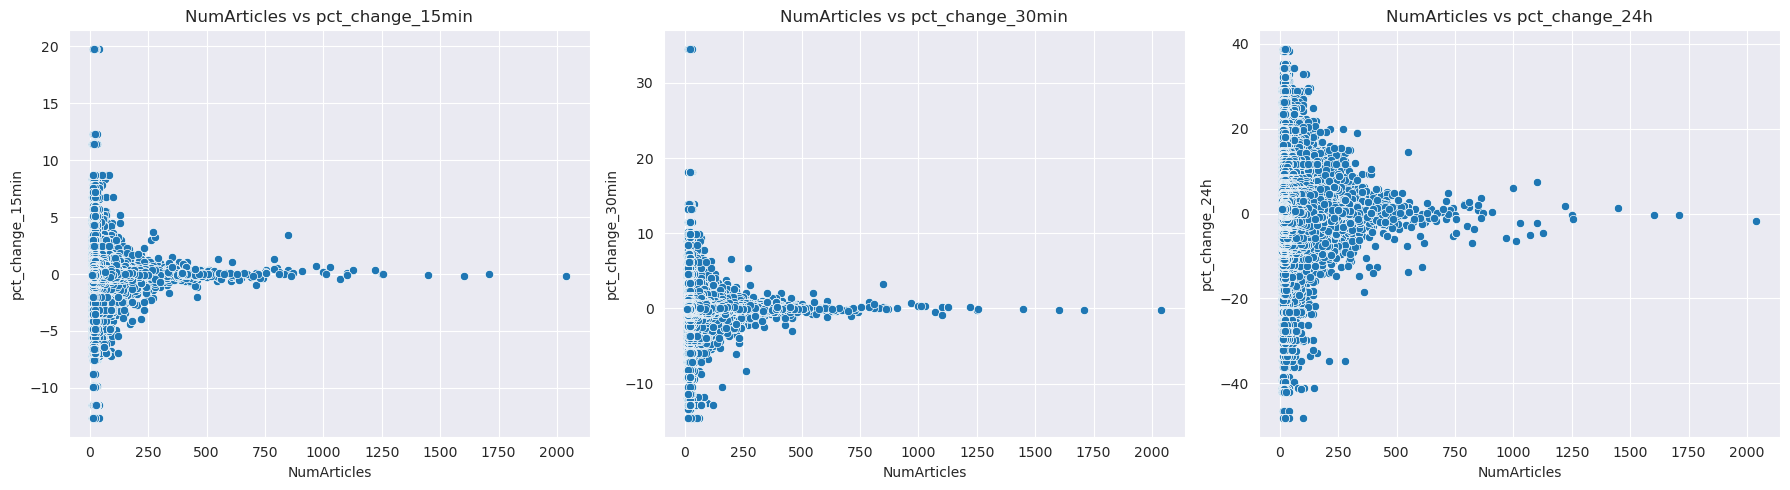

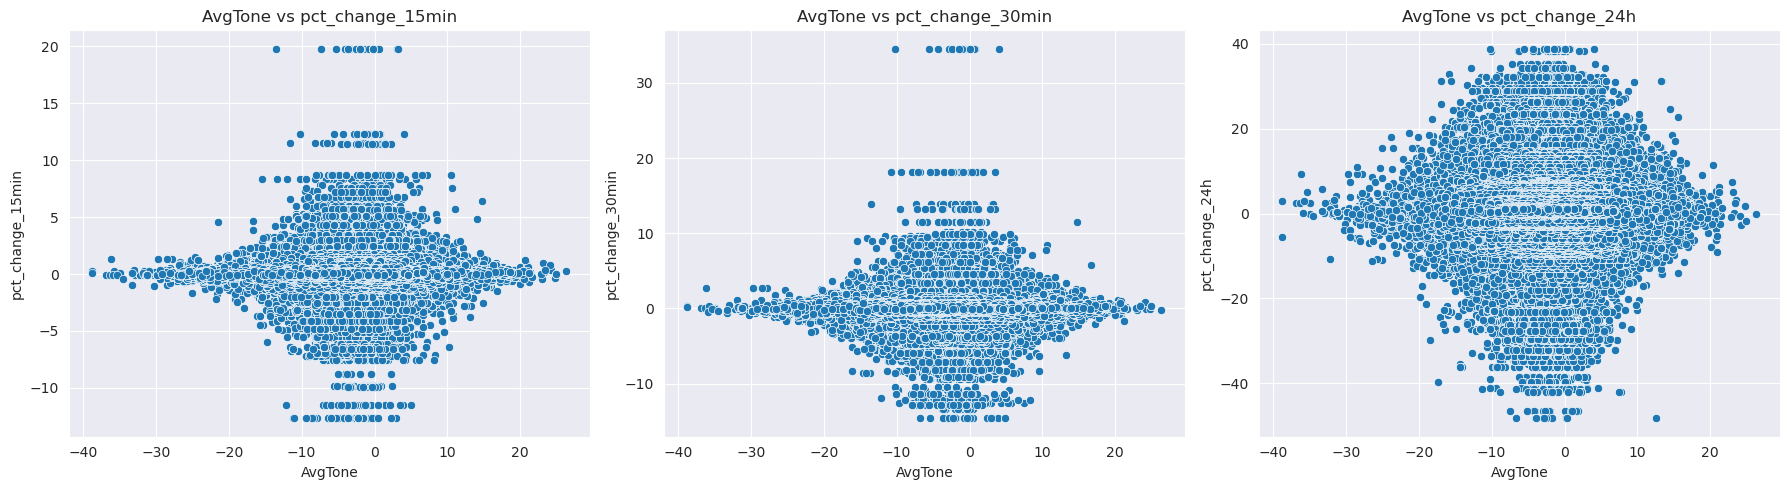

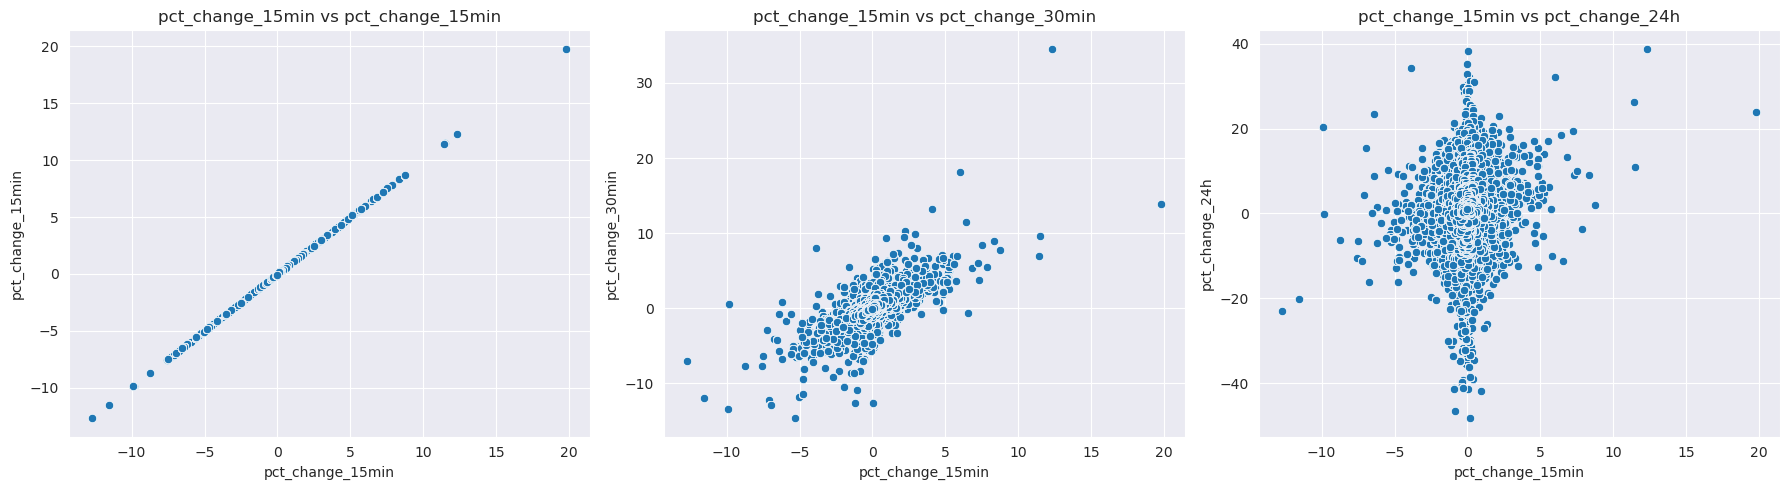

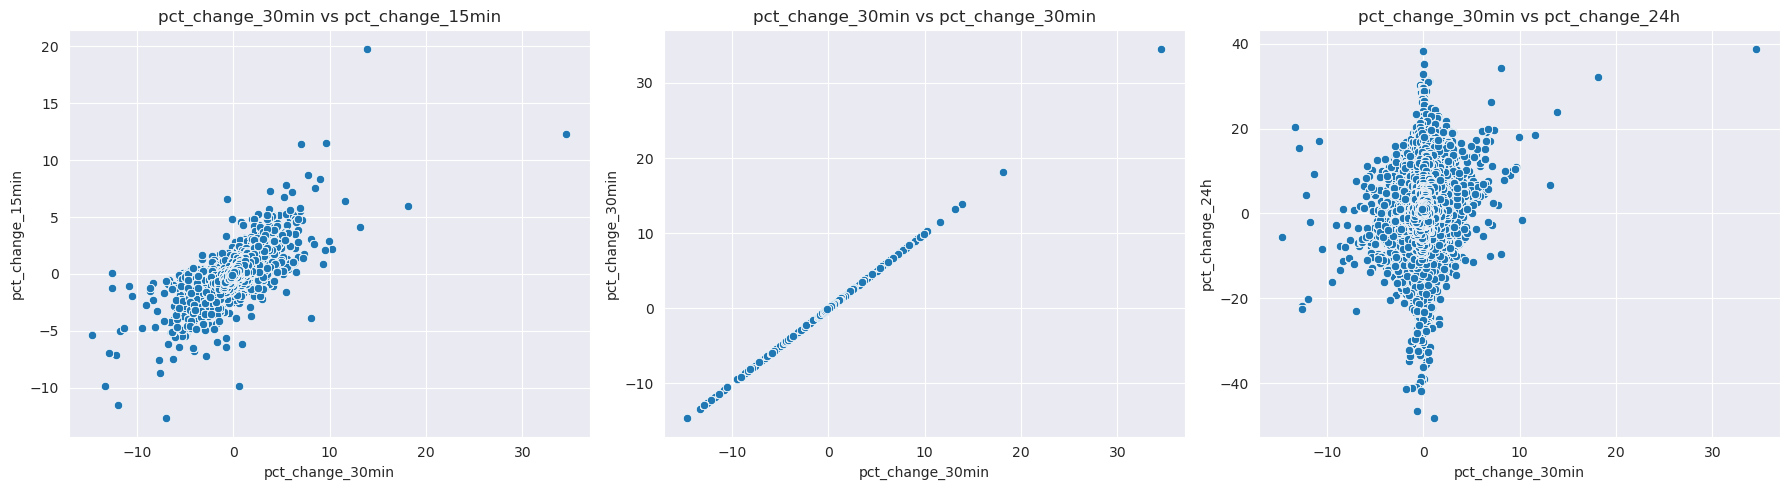

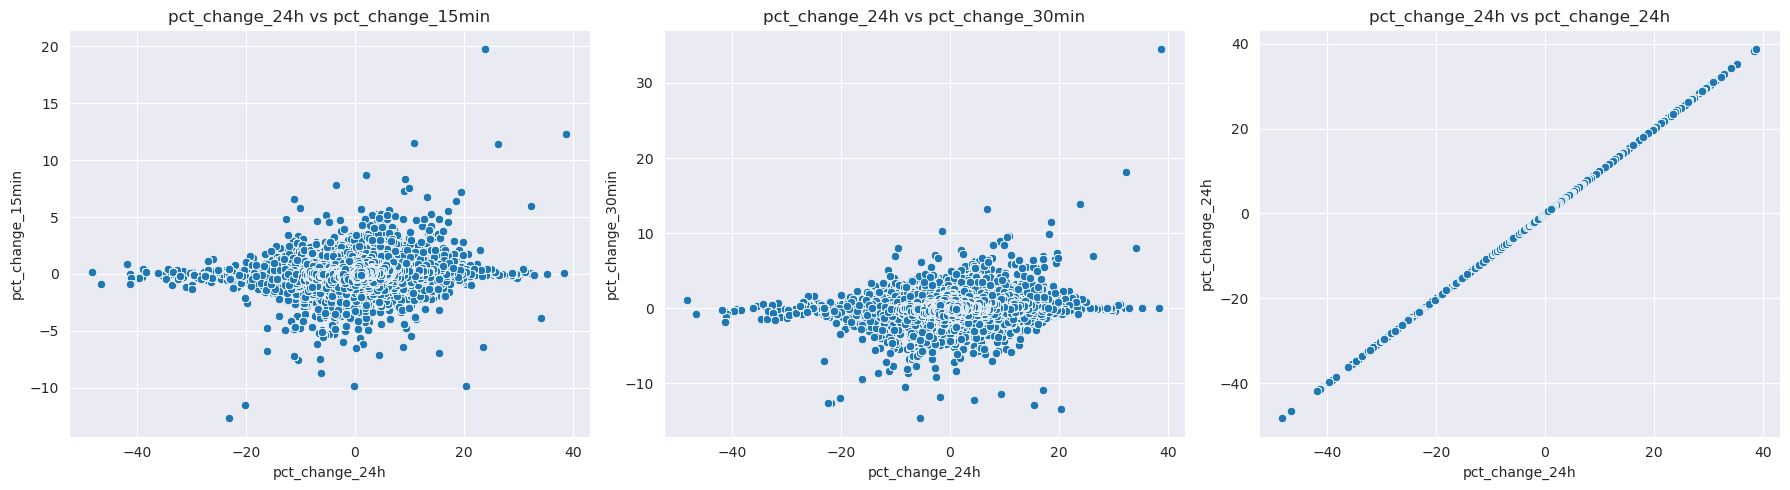

In [18]:
# Plot every column in merged dataframe as a scatter plot against the target variable
for col in numerical_columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(ax=axes[0], x=col, y='pct_change_15min', data=encoded)
    axes[0].set_title(f'{col} vs pct_change_15min')

    sns.scatterplot(ax=axes[1], x=col, y='pct_change_30min', data=encoded)
    axes[1].set_title(f'{col} vs pct_change_30min')

    sns.scatterplot(ax=axes[2], x=col, y='pct_change_24h', data=encoded)
    axes[2].set_title(f'{col} vs pct_change_24h')

    plt.tight_layout()
    plt.show()